<a href="https://colab.research.google.com/github/AnupamaGeorge/Capstone-Project---FRA/blob/ALG/MICE_Imputation_bankfile_with_outlier_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df1= df.copy(deep=True)
df1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [4]:
df1.loc[(df1.poutcome=='unknown') & (df1.pdays==-1),'poutcome'] = 'Not Contacted'

In [5]:
df1['poutcome'].value_counts()

Not Contacted    36954
failure           4901
other             1840
success           1511
unknown              5
Name: poutcome, dtype: int64

In [6]:
df1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [7]:
df1.loc[df1['pdays']==-1, 'pdays'] = 'No'
df1.loc[df1['pdays'] !='No', 'pdays'] = 'Yes'
df1.pdays.value_counts()

No     36954
Yes     8257
Name: pdays, dtype: int64

In [8]:
df1.rename(columns = {'pdays':'contactPrev'}, inplace = True)

In [9]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,contactPrev,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,No,0,Not Contacted,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,No,0,Not Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,No,0,Not Contacted,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,No,0,Not Contacted,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,No,0,Not Contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,No,0,Not Contacted,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,No,0,Not Contacted,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,Yes,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,No,0,Not Contacted,no


In [10]:
df1.drop(['day','previous'], axis=1, inplace =True)

In [11]:
df1.replace('unknown',np.NaN, inplace=True)
df1

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,may,261,1,No,Not Contacted,no
1,44,technician,single,secondary,no,29,yes,no,NaN,may,151,1,No,Not Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,may,76,1,No,Not Contacted,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,may,92,1,No,Not Contacted,no
4,33,NaN,single,NaN,no,1,no,no,NaN,may,198,1,No,Not Contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,No,Not Contacted,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,No,Not Contacted,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,Yes,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,No,Not Contacted,no


In [12]:
df1.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
month              0
duration           0
campaign           0
contactPrev        0
poutcome           5
y                  0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   month        45211 non-null  object
 10  duration     45211 non-null  int64 
 11  campaign     45211 non-null  int64 
 12  contactPrev  45211 non-null  object
 13  poutcome     45206 non-null  object
 14  y            45211 non-null  object
dtypes: int64(4), object(11)
memory usage: 5.2+ MB


In [14]:
(df1['duration']==0).value_counts()

False    45208
True         3
Name: duration, dtype: int64

In [15]:
df1.drop(df1[df1['duration']==0].index, inplace=True)

In [16]:
(df1['duration']==0).value_counts()

False    45208
Name: duration, dtype: int64

In [17]:
df1.shape

(45208, 15)

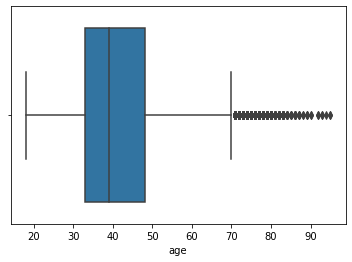

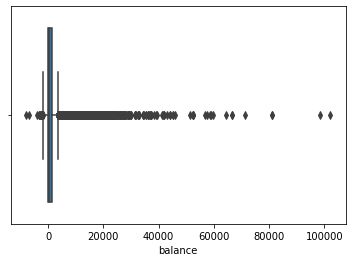

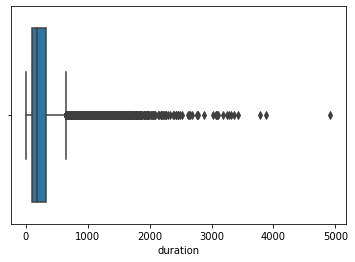

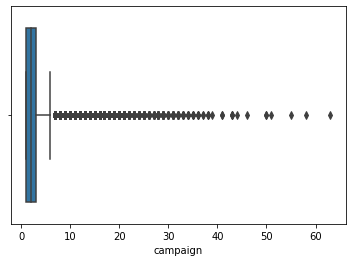

In [18]:
for i in df1.select_dtypes(include = 'int64'):
  sns.boxplot(df1[i])
  plt.show()

#Converting outliers as null values for imputation purpose.

Age Column 

In [19]:
tw_age = df1['age'].quantile(0.75) + (1.5 * (df1['age'].quantile(0.75) - df1['age'].quantile(0.25)) )
bw_age = df1['age'].quantile(0.25) - (1.5 * (df1['age'].quantile(0.75) - df1['age'].quantile(0.25)) )
print(tw_age,'\n', bw_age)

70.5 
 10.5


In [20]:
df1['age'].isnull().sum()

0

In [21]:
df1.loc[(df1['age']>70.5), 'age'] = np.NaN

In [22]:
df1['age'].isnull().sum()

487

Balance Column

In [23]:
tw_bal = df1['balance'].quantile(0.75) + (1.5 * (df1['balance'].quantile(0.75) - df1['balance'].quantile(0.25)) )
bw_bal = df1['balance'].quantile(0.25) - (1.5 * (df1['balance'].quantile(0.75) - df1['balance'].quantile(0.25)) )
print(tw_bal,'\n', bw_bal)

3462.0 
 -1962.0


In [24]:
df1.loc[(df1['balance']>3462), 'balance'] = np.NaN

In [25]:
df1.loc[(df1['balance']<-1962), 'balance'] = np.NaN

In [26]:
df1['balance'].isnull().sum()

4728

Duration Column

In [27]:
tw_dur = df1['duration'].quantile(0.75) + (1.5 * (df1['duration'].quantile(0.75) - df1['duration'].quantile(0.25)) )
bw_dur = df1['duration'].quantile(0.25) - (1.5 * (df1['duration'].quantile(0.75) - df1['duration'].quantile(0.25)) )
print(tw_dur,'\n', bw_dur)

643.0 
 -221.0


In [28]:
df1.loc[(df1['duration']>634), 'duration'] = np.NaN

In [29]:
df1.loc[(df1['duration']<-221), 'duration'] = np.NaN

In [30]:
df1['duration'].isnull().sum()

3345

Campaign Column

In [31]:
tw_cam = df1['campaign'].quantile(0.75) + (1.5 * (df1['campaign'].quantile(0.75) - df1['campaign'].quantile(0.25)) )
bw_cam = df1['campaign'].quantile(0.25) - (1.5 * (df1['campaign'].quantile(0.75) - df1['campaign'].quantile(0.25)) )
print(tw_cam,'\n', bw_cam)

6.0 
 -2.0


In [32]:
df1.loc[(df1['campaign']>6), 'campaign'] = np.NaN

In [33]:
df1.loc[(df1['campaign']<-2), 'campaign'] = np.NaN

In [34]:
df1['campaign'].isnull().sum()

3063

Checking Null values for each column:

In [35]:
df1.isnull().sum()

age              487
job              288
marital            0
education       1857
default            0
balance         4728
housing            0
loan               0
contact        13019
month              0
duration        3345
campaign        3063
contactPrev        0
poutcome           5
y                  0
dtype: int64

Taking dataframe of only the features for imputation. No null values in target variable.

In [36]:
X = df1.drop(['y'], axis = 1)
X

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome
0,58.0,management,married,tertiary,no,2143.0,yes,no,NaN,may,261.0,1.0,No,Not Contacted
1,44.0,technician,single,secondary,no,29.0,yes,no,NaN,may,151.0,1.0,No,Not Contacted
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,may,76.0,1.0,No,Not Contacted
3,47.0,blue-collar,married,NaN,no,1506.0,yes,no,NaN,may,92.0,1.0,No,Not Contacted
4,33.0,NaN,single,NaN,no,1.0,no,no,NaN,may,198.0,1.0,No,Not Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,NaN,3.0,No,Not Contacted
45207,NaN,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,No,Not Contacted
45208,NaN,retired,married,secondary,no,NaN,no,no,cellular,nov,NaN,5.0,Yes,success
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,No,Not Contacted


In [63]:
y=df1['y']

Checking missing value characteristics

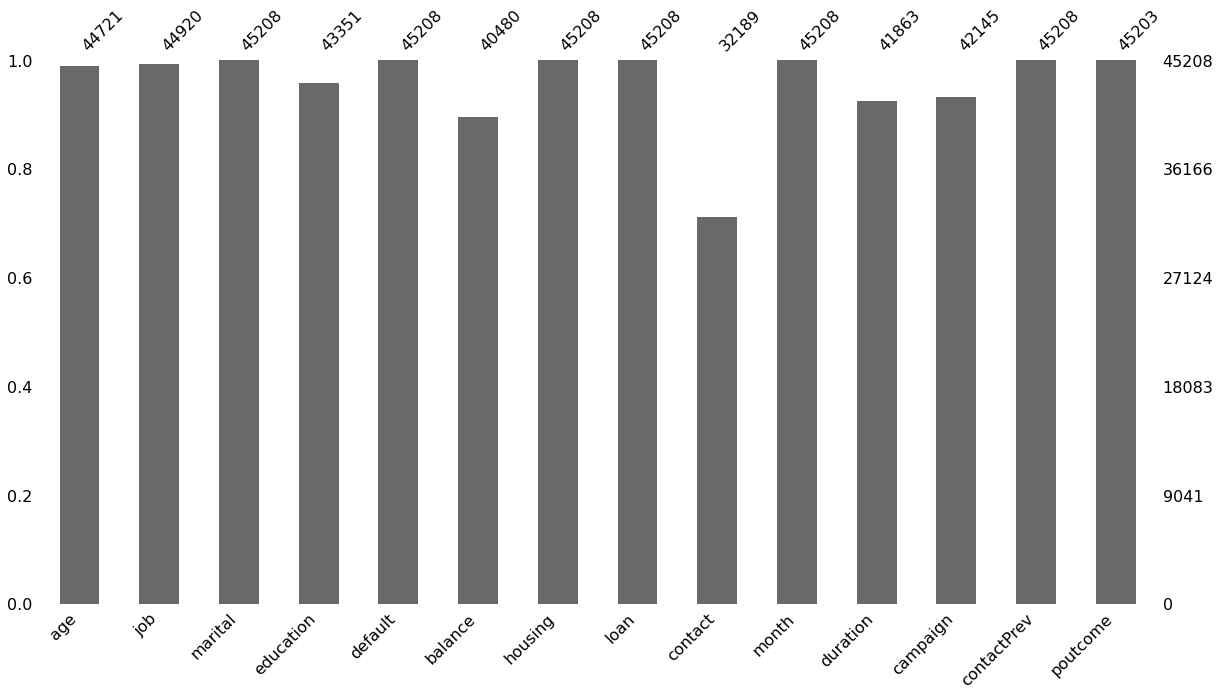

In [37]:
msno.bar(X,figsize=(20, 10))

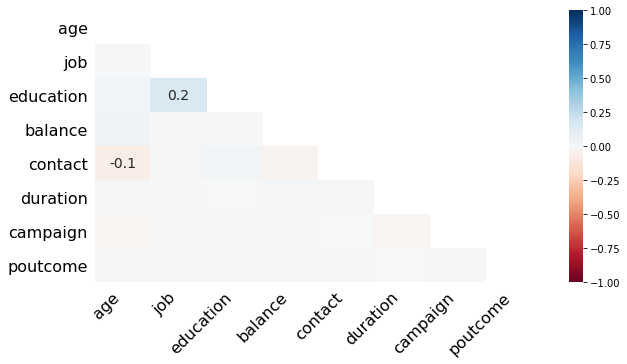

In [38]:
msno.heatmap(X,figsize=(10, 5))

The Nullity heatmap shows no correlation between the missing values except a weak correlation between job and education. If there is no nullity correlation, it means that there is a better chance of predicting a variable from other existing variables since their existence or non-existence should not affect the variables we are trying to predict.

----------------------------------------------

## LABEL ENCODING BLOCK

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
columns=['job', 'education','marital','default','month','housing','loan','contact','poutcome', 'contactPrev']
# Create an empty dictionary ordinal_enc_dict
label_enc_dict = {}

for col_name in columns:
    # Create Label encoder for col
    label_enc_dict[col_name] = LabelEncoder()
    col = X[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = label_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    X.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
X

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome
0,58.0,4,1,2,0,2143.0,1,0,NaN,8,261.0,1.0,0,0
1,44.0,9,2,1,0,29.0,1,0,NaN,8,151.0,1.0,0,0
2,33.0,2,1,1,0,2.0,1,1,NaN,8,76.0,1.0,0,0
3,47.0,1,1,NaN,0,1506.0,1,0,NaN,8,92.0,1.0,0,0
4,33.0,NaN,2,NaN,0,1.0,0,0,NaN,8,198.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825.0,0,0,0,9,NaN,3.0,0,0
45207,NaN,5,0,0,0,1729.0,0,0,0,9,456.0,2.0,0,0
45208,NaN,5,1,1,0,NaN,0,0,0,9,NaN,5.0,1,3
45209,57.0,1,1,1,0,668.0,0,0,1,9,508.0,4.0,0,0


In [42]:
X.isnull().sum()

age              487
job              288
marital            0
education       1857
default            0
balance         4728
housing            0
loan               0
contact        13019
month              0
duration        3345
campaign        3063
contactPrev        0
poutcome           5
dtype: int64

# MICE Imputation

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [50]:
term_mice_imputed = X.copy()
mice_imputer = IterativeImputer(initial_strategy = 'median', imputation_order = 'random')

In [51]:
term_mice_imputed.iloc[:, :] = np.round(mice_imputer.fit_transform(term_mice_imputed))

In [52]:
cols=['age','job','education','balance','contact', 'duration', 'campaign', 'poutcome']
for i in cols:
  print(term_mice_imputed[i].isnull().sum())

0
0
0
0
0
0
0
0


In [53]:
term_mice_imputed.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,8.0,261.0,1.0,0.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,8.0,151.0,1.0,0.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,8.0,76.0,1.0,0.0,0.0
3,47.0,1.0,1.0,1.0,0.0,1506.0,1.0,0.0,0.0,8.0,92.0,1.0,0.0,0.0
4,33.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,198.0,1.0,0.0,0.0


In [57]:
columns=['job', 'education','marital','default','month','housing','loan','contact','poutcome', 'contactPrev']

for i in columns:
  term_mice_imputed[i] =  term_mice_imputed[i].astype(int)


In [58]:
term_mice_imputed.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome
0,58.0,4,1,2,0,2143.0,1,0,0,8,261.0,1.0,0,0
1,44.0,9,2,1,0,29.0,1,0,0,8,151.0,1.0,0,0
2,33.0,2,1,1,0,2.0,1,1,0,8,76.0,1.0,0,0
3,47.0,1,1,1,0,1506.0,1,0,0,8,92.0,1.0,0,0
4,33.0,5,2,1,0,1.0,0,0,0,8,198.0,1.0,0,0


In [59]:
# Loop over the column names in users
columns = ['job', 'education','marital','default','month','housing','loan','contact','poutcome', 'contactPrev']
for col_name in columns:
    
    # Reshape the data
    reshaped = term_mice_imputed[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the Label encoded columns
    term_mice_imputed[col_name] = label_enc_dict[col_name].inverse_transform(reshaped)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
term_mice_imputed

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,193.0,3.0,No,Not Contacted
45207,52.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,No,Not Contacted
45208,44.0,retired,married,secondary,no,895.0,no,no,cellular,nov,227.0,5.0,Yes,success
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,No,Not Contacted


In [61]:
term_mice_imputed.job.value_counts()

blue-collar      9732
management       9578
technician       7596
admin.           5171
services         4154
retired          2398
self-employed    1592
entrepreneur     1486
unemployed       1303
housemaid        1260
student           938
Name: job, dtype: int64

In [64]:
mice_imputed_bankdata = pd.concat([term_mice_imputed,y], axis = 1)
mice_imputed_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted,no
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted,no
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted,no


In [66]:
mice_imputed_bankdata.y.value_counts()

no     39919
yes     5289
Name: y, dtype: int64

In [67]:
from google.colab import drive
drive.mount('drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [69]:
mice_imputed_bankdata.to_csv('mice_imputed_outlier_final.csv')
!cp mice_imputed_outlier_final.csv "drive/My Drive/"